### 使用sklearn包进行逻辑回归实验分析

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

np.random.seed(42)

#### Sigmoid函数

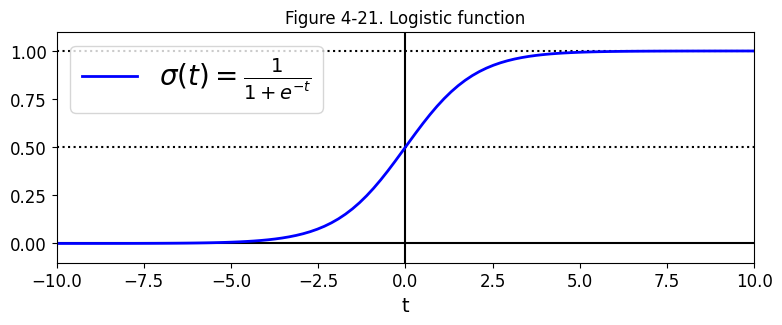

In [3]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.title('Figure 4-21. Logistic function')
plt.show()

iris数据集中：
- data：二维数组，(150, 4)
- target：一维数组，0、1、2
- target_name：数组

In [131]:
from sklearn.datasets import load_iris
iris = load_iris()

print(list(iris.keys()))
print(data.DESCR) #描述

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:   

#### 对于传统逻辑回归，要对标签**多变换**
- 就是属于当前类别为1
- 其他类别为0

若target是花名的话：
- 如果data是数组`(data == 'Virginica').astype(int)`
- 如果data是datafram`(data['target'] == 'Virginica').astype(int)`
- 如果data是dict[list] `np.array(1 if target == 'Virginica' else 0 for target in data['target'])`

In [136]:
X = iris['data'][:, [3]]
# y = np.array(1 if target == 'Virginica' else 0 for target in data['target'])
y = (iris['target'] == 2).astype(int)

```
log_reg = LogisticRegression()
log_reg.fit(X, y)
```
- LogisticRegression 模型的 fit() 函数期望 y 是一个一维数组

In [137]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

#### 可视化展示
- **箭头**`plt.arrow`
- `plt.text`
- 一步步添加，现查即可，不用背
- **查询用法**：`print(help(plt.arrow))`

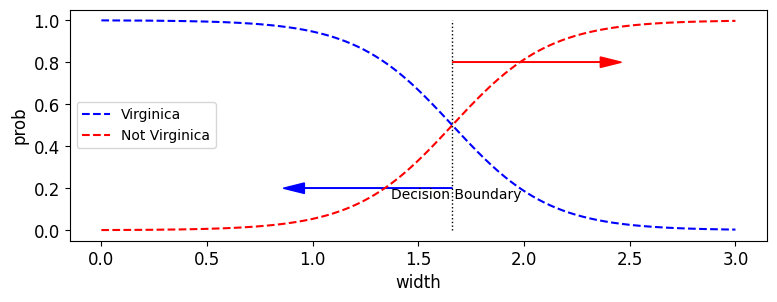

In [65]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_prob_predict = log_reg.predict_proba(X_new)

plt.figure(figsize=(9, 3))
plt.plot(X_new, y_prob_predict[:, 0], 'b--', label='Virginica')
plt.plot(X_new, y_prob_predict[:, 1], 'r--', label='Not Virginica')

# 交汇处的位置
decision_boundary = X_new[y_prob_predict[:, 1]>=0.5][0][0] # 是一个数（原本是一个二维数组）
plt.plot([decision_boundary, decision_boundary], [0, 1], 'k:', linewidth=1)

# 画箭头
# print(help(plt.arrow)) 查询 plt.arrow 的用法
plt.arrow(decision_boundary, 0.2, -0.7, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.8, 0.7, 0, head_width=0.05, head_length=0.1, fc='r', ec='r')
plt.text(decision_boundary+0.02, 0.15, 'Decision Boundary', fontsize=10, color = 'k', ha='center')

# plt.axis([0, 3, -0.5, 1.5])
plt.xlabel('width', fontsize=12)
plt.ylabel('prob', fontsize=12)
plt.legend(loc='center left', fontsize=10)

C参数：
- C的值越大，正则化的强度就越小，模型会倾向于更加拟合训练数据
- C的值越小，正则化的强度越大，模型会更强烈地限制参数的大小，防止过拟合

In [174]:
X = iris['data'][:, 2:4]
# X = iris['data'][:, (2,3)]

y = (iris['target'] == 2).astype(int)
log_reg = LogisticRegression(C=10000)
log_reg.fit(X, y)

LogisticRegression(C=10000)

### 绘制决策边界
相当于一条概率等高线
- 构建坐标数据`np.meshgrid`
- `log_reg.predict_proba(X_test)`得到是一个二维数组，每行表示该样本属于每个类别的概率
- `reshape(x0.shape)`这种写法是OK的
- `plt.clabel(cs, **kwargs)`给等高线图添加标签

In [175]:
x0, x1 = np.meshgrid(np.linspace(3, 7, 500), np.linspace(0, 2.6, 200))
X_test = np.c_[x0.ravel(), x1.ravel()]
y_predict_test = log_reg.predict_proba(X_test)

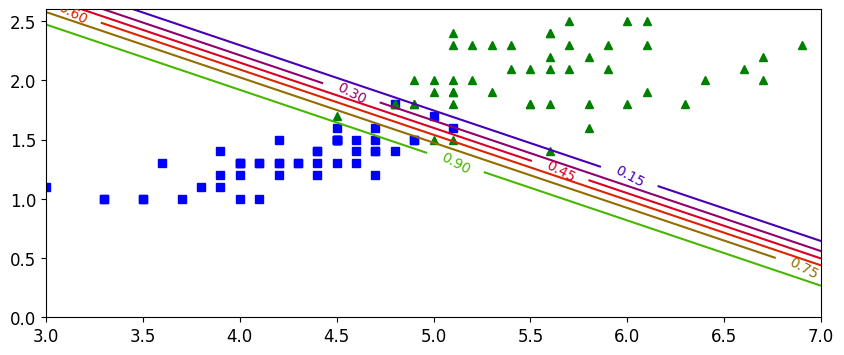

In [176]:
plt.figure(figsize=(10, 4))

plt.plot(X[y == 0, 0], X[y == 0, 1], 'bs')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'g^')

zz = y_predict_test[:, 0].reshape(x0.shape) # 是0还是1都无所谓

contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.axis([3, 7, 0, 2.6])
plt.show()

### Softmax函数
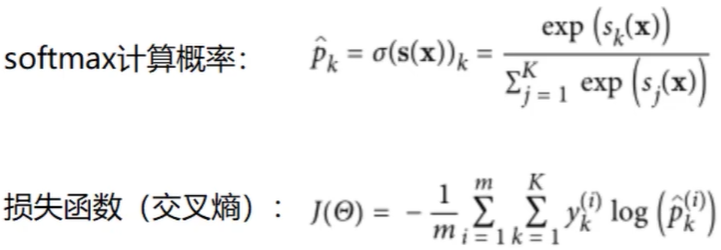  
- m：表示训练集中的样本数量
- K：表示类别的数量（多分类任务中）
- yk(i)：实际的标签（真实值），是**one-hot**编码的形式，如果i个样本的真实类别是k，则yk(i)=1，否则为0
- p那个：模型对第i个样本的类别k的预测概率

In [177]:
X = iris['data'][:, 2:4]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_reg.fit(X, y)

LogisticRegression(multi_class='multinomial')

In [178]:
# 实验
softmax_reg.predict_proba([[5, 3]])

array([[1.19170225e-05, 1.36462731e-02, 9.86341810e-01]])

#### 使用softmax回归模型对数据集进行分类+可视化模型的决策边界

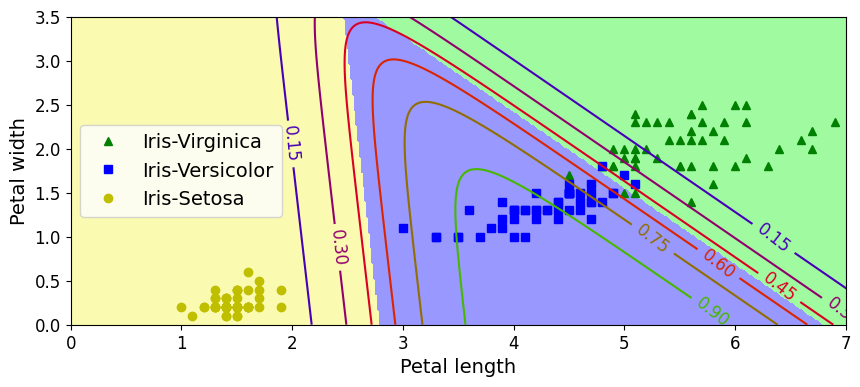

In [184]:
x0, x1 = np.meshgrid(np.linspace(0, 8, 500), np.linspace(0, 3.5, 200))
X_test = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_test)
y_predict = softmax_reg.predict(X_test)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


In [181]:
x0,x1 = np.meshgrid(np.linspace(1,2,2),np.linspace(10,20,3))
print(x0)
print(x1)
print(x0.ravel())
np.c_[x0.ravel(), x1.ravel()]

[[1. 2.]
 [1. 2.]
 [1. 2.]]
[[10. 10.]
 [15. 15.]
 [20. 20.]]
[1. 2. 1. 2. 1. 2.]


array([[ 1., 10.],
       [ 2., 10.],
       [ 1., 15.],
       [ 2., 15.],
       [ 1., 20.],
       [ 2., 20.]])